In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

2023-07-26 21:23:57.879465: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
R = Runner(verbose=True)

In [4]:
# load our dataset  (images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrasound_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrassound_masks.npy')

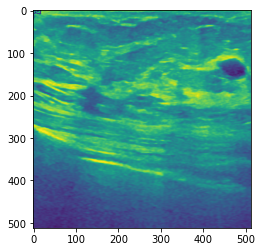

In [5]:
plt.imshow(images[446])

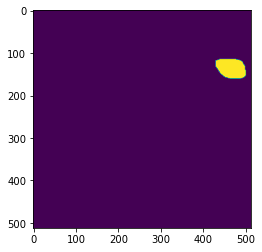

In [6]:
plt.imshow(masks[446])

In [7]:
R.run(images=images, masks=masks, runs=5)

Weights OK!
******
Loop 1
*** GP2  Unet ***
Working directory: /tmp/tmp7hq57jnaGP2


2023-07-26 21:24:04.519258: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-26 21:24:04.574373: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:24:04.576834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:24:04.583211: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-07-26 21:24:04.58

****** TRAINING CLASSIFIER ******


2023-07-26 21:24:07.550242: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-07-26 21:24:07.570995: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-07-26 21:24:22.047290: W tensorflow/core/common_runtime/bfc_allocator.cc:456] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.00GiB (rounded to 1073741824)requested by op model/conv2d/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-07-26 21:24:22.047331: I tensorflow/core/common_runtime/bfc_allocator.cc:991] BFCAllocator dump for GPU_0_bfc
2023-07-26 21:24:22.047351: I tensorflow/core/common_runtime/bfc_allocator.cc:998] Bin (256): 	Total Chunks: 228, Chunks in use: 228. 57.0KiB allocated for chunks. 57.0KiB in use in bin. 24.5KiB client-requested in use in bin.
2023-07-26 21:24:22.047357: I tensorflow/core/common_runtime/bfc_allocator.cc:998] Bin (512): 	Total Chunks: 58, Chunks in use: 58. 29.8KiB allocated for chunks. 29.8KiB in use in bin. 29.2KiB client-requested in use in bin.
2023-07-26 21:24:2

ResourceExhaustedError:  OOM when allocating tensor with shape[64,16,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv2d/Conv2D (defined at home/ryan.zurrin001/Projects/omama/_EXPERIMENTS/GP2v2/2_TESTING_WITH_ORIGINAL_UNET/../../../omama/gp2/core/classifiers/unet.py:216) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_9679]

Function call stack:
train_function


In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()